In [84]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [85]:
# Load the dataset
df = pd.read_csv('clustered_neighborhoods.csv', encoding='Latin')

# New Antecedent/Consequent objects hold universe variables and membership functions
accidents = ctrl.Antecedent(np.arange(0, 101, 1), 'accidents')
pollution = ctrl.Antecedent(np.arange(0, 101, 1), 'pollution')
change = ctrl.Consequent(np.arange(0, 11, 1), 'change')

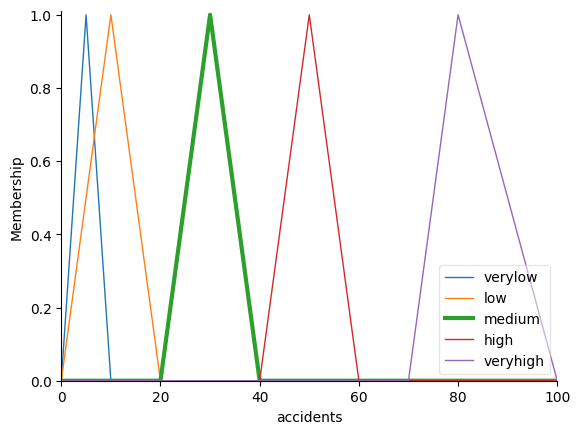

In [176]:
# Custom membership functions for 'accidents' and 'pollution' based on the data

# Custom membership functions for 'accidents' based on the data
accidents['verylow'] = fuzz.trimf(accidents.universe, [0, 5, 10])
accidents['low'] = fuzz.trimf(accidents.universe, [0, 10, 20])
accidents['medium'] = fuzz.trimf(accidents.universe, [20, 30, 40])
accidents['high'] = fuzz.trimf(accidents.universe, [40, 50, 60])
accidents['veryhigh'] = fuzz.trimf(accidents.universe, [70, 80, 100])

# Custom membership functions for 'pollution' to cover the entire range
pollution['verylow'] = fuzz.trimf(pollution.universe, [0, 10, 20])
pollution['low'] = fuzz.trimf(pollution.universe, [10, 30, 40])
pollution['medium'] = fuzz.trimf(pollution.universe, [30, 50, 60])
pollution['high'] = fuzz.trimf(pollution.universe, [50, 70, 80])
pollution['veryhigh'] = fuzz.trimf(pollution.universe, [80, 90, 100])

# Custom membership functions for 'change'
change['verylow'] = fuzz.trimf(change.universe, [0, 0, 0.5])
change['low'] = fuzz.trimf(change.universe, [2, 3, 4])
change['medium'] = fuzz.trimf(change.universe, [4, 5, 6])
change['high'] = fuzz.trimf(change.universe, [6, 7, 8])
change['veryhigh'] = fuzz.trimf(change.universe, [5, 10, 10])

accidents['medium'].view()

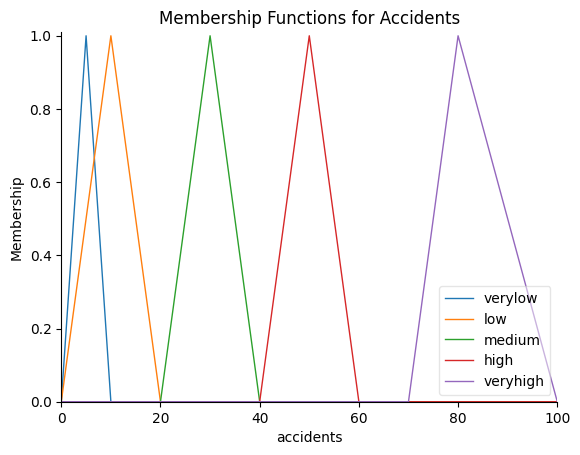

In [177]:
# Plot membership functions for 'accidents'
accidents.view()
plt.title('Membership Functions for Accidents')
plt.show()

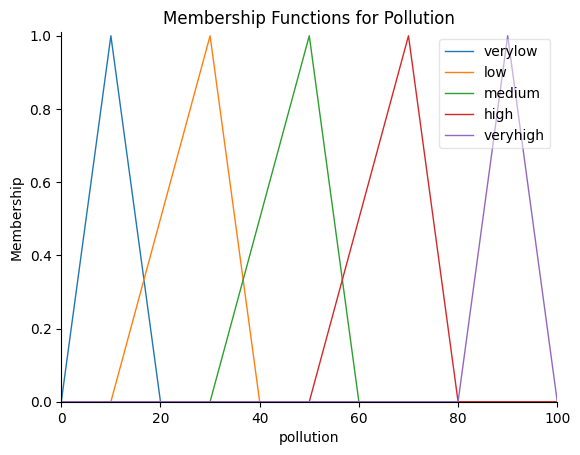

In [178]:
# Plot membership functions for 'pollution'
pollution.view()
plt.title('Membership Functions for Pollution')
plt.show()

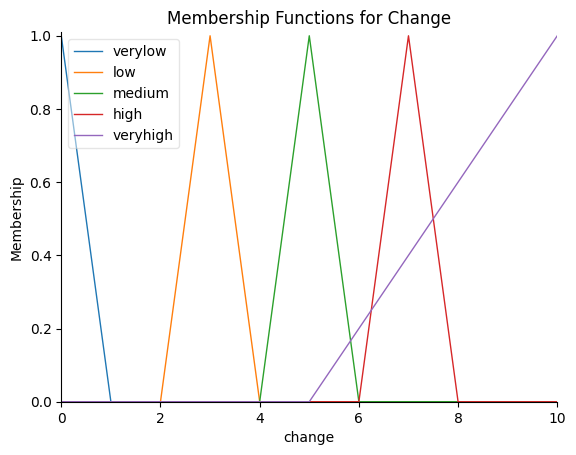

In [179]:
# Plot membership functions for 'change'
change.view()
plt.title('Membership Functions for Change')
plt.show()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

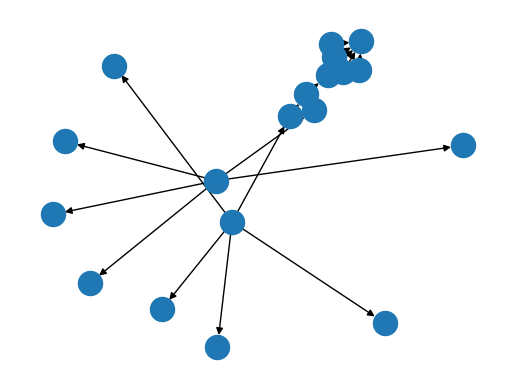

In [180]:
# Define rules based on the data and membership functions
rule1 = ctrl.Rule(accidents['verylow'] | pollution['verylow'], change['verylow'])
rule2 = ctrl.Rule(accidents['low'] | pollution['low'], change['low'])
rule3 = ctrl.Rule(accidents['medium'] | pollution['medium'], change['medium'])
rule4 = ctrl.Rule(accidents['high'] | pollution['high'], change['high'])
rule5 = ctrl.Rule(accidents['veryhigh'] | pollution['veryhigh'], change['veryhigh'])
rule1.view()

6.999999999999999


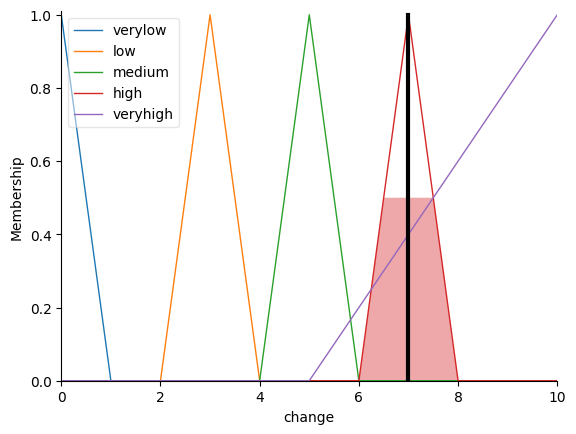

In [186]:
# Create the control system and simulation
change_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
changing = ctrl.ControlSystemSimulation(change_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
changing.input['accidents'] = 100  # Adjust with your data
changing.input['pollution'] = 60  # Adjust with your data

# Compute the result
changing.compute()

# Print and view the result
print(changing.output['change'])
change.view(sim=changing)

Accidents Grid:
[[  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 ...
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]
 [  0.   1.   2. ...  98.  99. 100.]]

Pollution Grid:
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.98989899  1.98989899  1.98989899 ...  1.98989899  1.98989899
   1.98989899]
 [ 2.97979798  2.97979798  2.97979798 ...  2.97979798  2.97979798
   2.97979798]
 ...
 [97.02020202 97.02020202 97.02020202 ... 97.02020202 97.02020202
  97.02020202]
 [98.01010101 98.01010101 98.01010101 ... 98.01010101 98.01010101
  98.01010101]
 [99.         99.         99.         ... 99.         99.
  99.        ]]


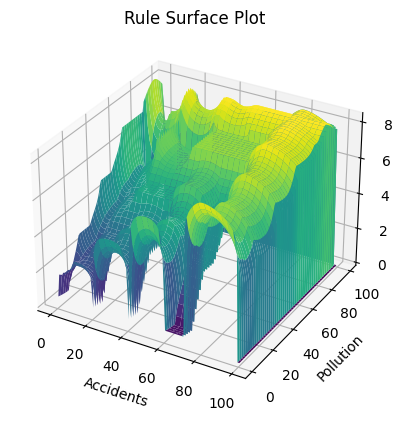

In [187]:
# Create a meshgrid for 'accidents' and 'pollution'
accidents_values = np.linspace(0, 100, 101)
pollution_values = np.linspace(1, 99, 100)
accidents_grid, pollution_grid = np.meshgrid(accidents_values, pollution_values)

# Print the arrays
print("Accidents Grid:")
print(accidents_grid)

print("\nPollution Grid:")
print(pollution_grid)

# Compute the change values for each combination of inputs
change_values = np.zeros_like(accidents_grid)

for i in range(99):
    for j in range(99):
        changing.input['accidents'] = accidents_grid[i, j]
        changing.input['pollution'] = pollution_grid[i, j]
        changing.compute()
        change_values[i, j] = changing.output['change']

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(accidents_grid, pollution_grid, change_values, cmap='viridis')

ax.set_xlabel('Accidents')
ax.set_ylabel('Pollution')
ax.set_zlabel('Change')
ax.set_title('Rule Surface Plot')
plt.show()